In [16]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

## Reduces
from typing import Annotated
from langgraph.graph.message import add_messages


In [17]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")


In [18]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")


AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BglBQ0TrUxSZXB3Tf0RJdAGlKhWpN', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--304a02d3-8596-4617-b04b-e1913360edbd-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
from langchain_groq import ChatGroq
groq=ChatGroq(model="qwen-qwq-32b")
groq.invoke("Hello")


AIMessage(content='\n<think>\nOkay, the user said "Hello". I should respond politely. Let me think of a friendly greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s open-ended and invites them to state their needs. I should make sure to keep it simple and not overcomplicate. Yeah, that should work.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 80, 'prompt_tokens': 11, 'total_tokens': 91, 'completion_time': 0.194337069, 'prompt_time': 0.003146979, 'queue_time': 1.3219848049999998, 'total_time': 0.197484048}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--4e0f26dc-1b48-4d36-9607-b4fc202999db-0', usage_metadata={'input_tokens': 11, 'output_tokens': 80, 'total_tokens': 91})

In [20]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [21]:
def chatbot(state: State):
    return {"messages": [groq.invoke(state["messages"])]}


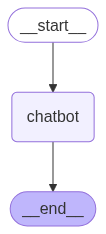

In [22]:
from IPython.display import Image
graph = StateGraph(State)
graph.add_node(
    "chatbot",
    chatbot
)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [23]:
graph_builder.invoke({"messages": [{"role": "user", "content": "Hi Iam Jaya,Iam really interested in Cybersecurity"}]})


{'messages': [HumanMessage(content='Hi Iam Jaya,Iam really interested in Cybersecurity', additional_kwargs={}, response_metadata={}, id='132e85a8-365c-4f0f-9c70-2d94be81e7e1'),
  AIMessage(content="\n<think>\nOkay, the user introduced themselves as Jaya and mentioned an interest in cybersecurity. I should welcome them and ask about their background. Maybe they're new to the field or have some experience. Let me make sure to keep the response friendly and encouraging. I'll also mention some common entry points into cybersecurity like education, certifications, or self-study. It's important to invite them to share more so I can give tailored advice. Need to avoid jargon and keep it approachable. Maybe suggest some resources or areas to explore. Let me structure the response to be open-ended and supportive.\n</think>\n\nHello Jaya! Welcome to the world of cybersecurity—it's an exciting and ever-evolving field! 😊 Could you share a bit more about your background or what specifically interes

In [24]:
## Streaming the responses
## stream_mode="values" will return all the responses from the chatbot , "updates will return the latest message from the chatbot

for event in graph_builder.stream({"messages": "Hi Iam Jaya,Iam really interested in Cybersecurity"},stream_mode="updates"):
    print(event)

{'chatbot': {'messages': [AIMessage(content='\n<think>\nOkay, so I\'m Jaya, and I\'m really interested in cybersecurity. I want to learn more about this field and figure out how to get started. Let me think about what I know already. I know cybersecurity has something to do with protecting computers, networks, and data from attacks. But I\'m not exactly sure what all the different areas are. Maybe I should start by breaking down the basics.\n\nFirst, I should probably understand the core concepts of cybersecurity. What are the main principles? I remember hearing terms like confidentiality, integrity, and availability. Those are part of the CIA triad, right? So confidentiality is keeping data private, integrity is ensuring data isn\'t altered without authorization, and availability means making sure data is accessible when needed. That makes sense. But how do these principles apply in real-world scenarios?\n\nThen there are the types of attacks. I think there are things like phishing, m

In [25]:
## Messages are used in the different roles wothin a conversation.Langchain has various messages types including 
## HumanMessage,AIMessage,SystemMessage and ToolMessage
## Every message contains content,name,response_metadata

from langchain_core.messages import AIMessage,HumanMessage
from pprint import pprint

messages = [AIMessage(content="Hello",name="LLMmodel")]
messages.append(HumanMessage(content="Hi Iam Jaya,Iam really interested in Cybersecurity"))
for message in messages:
    message.pretty_print()

================================== Ai Message ==================================
Name: LLMmodel

Hello
================================ Human Message =================================

Hi Iam Jaya,Iam really interested in Cybersecurity


In [26]:
## We can use a sequence of messagess as input with chatmodels using llm and OpenAI
from langchain_groq import ChatGroq
groq=ChatGroq(model="qwen-qwq-32b")
result = groq.invoke(messages)

In [27]:
result.response_metadata

{'token_usage': {'completion_tokens': 830,
  'prompt_tokens': 33,
  'total_tokens': 863,
  'completion_time': 1.923597411,
  'prompt_time': 0.003617396,
  'queue_time': 0.343067495,
  'total_time': 1.927214807},
 'model_name': 'qwen-qwq-32b',
 'system_fingerprint': 'fp_9faf42d81f',
 'finish_reason': 'stop',
 'logprobs': None}

In [28]:
print(result.content) #result.content


<think>
Okay, let's see. The user is Jaya, and she mentioned she's really interested in Cybersecurity. I need to respond in a friendly and helpful way. First, I should acknowledge her interest. Maybe start with a greeting and a positive response.

Hmm, what does someone new to Cybersecurity need to know? She might be looking for entry points into the field. I should suggest some foundational topics. Maybe mention key areas like networking, cryptography, and ethical hacking. Also, certifications could be important. Certifications like CompTIA Security+, CEH, or CISSP come to mind. But wait, CISSP requires experience, so maybe mention that it's for more advanced stages.

She might also benefit from practical skills. Recommending learning about Linux, scripting, and tools like Wireshark or Burp Suite. Hands-on experience is crucial, so maybe suggest platforms like TryHackMe or hacking villages. Oh, and staying updated with the latest threats and reading resources like Krebs on Security o

## Router
Chat model routes the flow between the direct response or a tool call based upon the user input


In [29]:
## Simple flow that redirects to a custom tool for the add operation
def add(a: int, b: int) -> int:
    """ Add a and b
    Args:
        a: int
        b: int
    Return:
        int
    """
    return a + b

In [30]:
groq_with_add =groq.bind_tools([add])

In [31]:
from langchain_core.messages import HumanMessage
groq_with_add.invoke([HumanMessage(content="What is 3 + 2")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_dab4', 'function': {'arguments': '{"a":3,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 155, 'prompt_tokens': 183, 'total_tokens': 338, 'completion_time': 0.357785721, 'prompt_time': 0.018971862, 'queue_time': 0.406211758, 'total_time': 0.376757583}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_9faf42d81f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--438fa5e4-97bc-4ab7-8722-13986ff090eb-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 2}, 'id': 'call_dab4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 183, 'output_tokens': 155, 'total_tokens': 338})

In [32]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    name: str
    

In [34]:
#### Reducer with add_messages

initial_messages = [HumanMessage(content="Hello",name="LLMmodel")]
graph = StateGraph(State)
graph.add_node(
    "chatbot",
    chatbot
)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder = graph.compile()
graph_builder.invoke({"messages": initial_messages})

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, name='LLMmodel', id='60958b28-5b71-4024-bafb-481424db63a1'),
  AIMessage(content='\n<think>\nOkay, the user said "Hello". I need to respond in a friendly and welcoming way. Let me think of a common greeting. Maybe "Hello! How can I assist you today?" That\'s good because it\'s polite and opens the conversation for them to explain what they need. I should make sure not to overcomplicate it. Keep it simple and approachable. Yeah, that should work.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 11, 'total_tokens': 104, 'completion_time': 0.226390088, 'prompt_time': 0.002881358, 'queue_time': 0.246859118, 'total_time': 0.229271446}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'stop', 'logprobs': None}, id='run--8553b0e0-2c0e-4ec1-83c7-d9c0df54ba15-0', usage_meta

In [35]:
def llm_with_add(state: State):
    return {"messages": [groq_with_add.invoke(state["messages"])]}

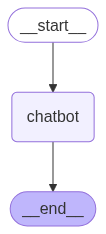

In [37]:
from IPython.display import Image
graph = StateGraph(State)
graph.add_node(
    "chatbot",
    llm_with_add
)

graph.add_edge(START,"chatbot")
graph.add_edge("chatbot",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [41]:
messages=graph_builder.invoke({"messages": "Add 23 and twenty"})

In [42]:
for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Add 23 and twenty
================================== Ai Message ==================================
Tool Calls:
  add (call_2980)
 Call ID: call_2980
  Args:
    a: 23
    b: 20


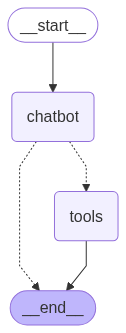

In [47]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

tools = [add]
graph = StateGraph(State)
graph.add_node(
    "chatbot",
    llm_with_add)

graph.add_node(
    "tools",
    ToolNode(tools)
)

graph.add_edge(START,"chatbot")
graph.add_conditional_edges("chatbot",tools_condition)
graph.add_edge("tools",END)

graph_builder = graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))
 

In [50]:
messages =graph_builder.invoke({"messages": "Add 23 and twenty"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

Add 23 and twenty
================================== Ai Message ==================================
Tool Calls:
  add (call_3jyk)
 Call ID: call_3jyk
  Args:
    a: 23
    b: 20
================================= Tool Message =================================
Name: add

43
